<a href="https://colab.research.google.com/github/Sarvagya2009/GRIP/blob/main/Stockann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Rotational Internship Program**

# The Sparks Foundation

Author: Sarvagya Kumar
                                                                                                         

# **TASK 7: Stock Market Prediction using Numerical and Textual Analysis**
# #GRIPJAN21

**IMPORTING NECESSARY PACKAGES**

In [56]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**READING NEWS HEADLINES CSV FILE AND LOADING IT TO NEWS DATAFRAME**

In [57]:
cols = ['Date','Category','HeadLine']
news=pd.read_csv('india-news-headlines.csv', names=cols)
news.head(10)

,Date,Category,HeadLine
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
5,20010102,unknown,For bigwigs; it is destination Goa
6,20010102,unknown,Extra buses to clear tourist traffic
7,20010102,unknown,Dilute the power of transfers; says Riberio
8,20010102,unknown,Focus shifts to teaching of Hindi
9,20010102,unknown,IT will become compulsory in schools


**PREPROCESSING OF NEWS DATAFRAME**

In [58]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Date      object
 1   HeadLine  object
dtypes: object(2)
memory usage: 75.5+ MB


In [59]:
news.head()

,Date,HeadLine
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


Converting date to appropriate format

In [60]:
news['Date']= pd.to_datetime(news['Date'], format= '%Y%m%d')

news.head()

,Date,HeadLine
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa


Putting all headlines of a single date in a single column

In [61]:
news = news.groupby(['Date'])['HeadLine'].apply(lambda x: ','.join(x)).reset_index()
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news

,Date,HeadLine
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,"Powerless north India gropes in the dark,Think..."
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [62]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7080 non-null   datetime64[ns]
 1   HeadLine  7080 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 110.8+ KB


Tokenizing headlines=>Keeping non stopword words=> making them lower case

In [63]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

In [64]:

def process_text(lines):
    tokens = []
    #print(lines)
    toks = tokenizer.tokenize(lines)
    toks = [t.lower() for t in toks if t.lower() not in stop_words]
    return toks

        

In [65]:

c=[]
for i in range(len(news['HeadLine'])):
  x=process_text(news['HeadLine'][i])
  x=' '.join(x)
  c.append(x)

In [66]:
news['HeadLine']=pd.Series(c)
type(news['HeadLine'][0])
news.head()

,Date,HeadLine
0,2001-01-01,win cena satisfying defeating undertaker bigge...
1,2001-01-02,status quo disturbed ayodhya says vajpayee fis...
2,2001-01-03,powerless north india gropes dark think laxman...
3,2001-01-04,string pulled stephen hawking india vajpayee g...
4,2001-01-05,light combat craft takes india club class hawk...


**READING BSE HISTORICAL STOCKS CSV FILE AND LOADING IT TO HISTSTOCKS DATAFRAME**

In [67]:
histstocks=pd.read_csv('^BSESN.csv')
histstocks.drop('Volume', axis=1,inplace=True)
print(histstocks.isnull().sum())
print(histstocks.head(5))

Date          0
Open         74
High         74
Low          74
Close        74
Adj Close    74
dtype: int64
         Date         Open         High          Low        Close    Adj Close
0  2001-01-02  3953.219971  4028.570068  3929.370117  4018.879883  4018.879883
1  2001-01-03  3977.580078  4067.659912  3977.580078  4060.020020  4060.020020
2  2001-01-04  4180.970215  4180.970215  4109.549805  4115.370117  4115.370117
3  2001-01-05  4116.339844  4195.009766  4115.350098  4183.729980  4183.729980
4  2001-01-08  4164.759766  4206.720215  4101.529785  4120.430176  4120.430176


**PREPROCESSING OF HISTSTOCKS DATAFRAME**

In [68]:
histstocks.dropna(how='any', inplace=True)
histstocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [69]:
histstocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 0 to 4887
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4814 non-null   object 
 1   Open       4814 non-null   float64
 2   High       4814 non-null   float64
 3   Low        4814 non-null   float64
 4   Close      4814 non-null   float64
 5   Adj Close  4814 non-null   float64
dtypes: float64(5), object(1)
memory usage: 263.3+ KB


Slicing array to make training set from 02-01-2001 to 31-12-2018

In [70]:
histstocks['Date']= pd.to_datetime(histstocks['Date'])

histstocks=histstocks.set_index(histstocks['Date'])
stocks = histstocks['2001-01-02':'2019-01-01']

stocks.index = np.arange(0, len(stocks))

print(stocks.head())

stocks.isnull().sum()


        Date         Open         High          Low        Close    Adj Close
0 2001-01-02  3953.219971  4028.570068  3929.370117  4018.879883  4018.879883
1 2001-01-03  3977.580078  4067.659912  3977.580078  4060.020020  4060.020020
2 2001-01-04  4180.970215  4180.970215  4109.549805  4115.370117  4115.370117
3 2001-01-05  4116.339844  4195.009766  4115.350098  4183.729980  4183.729980
4 2001-01-08  4164.759766  4206.720215  4101.529785  4120.430176  4120.430176


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

Splitting News Data accordingly

In [71]:

news['Date']= pd.to_datetime(news['Date'])

news=news.set_index(news['Date'])
Xnews = news['2001-01-02':'2019-01-01']
Xnews.index = np.arange(0, len(Xnews))

print(Xnews.head())



        Date                                           HeadLine
0 2001-01-02  status quo disturbed ayodhya says vajpayee fis...
1 2001-01-03  powerless north india gropes dark think laxman...
2 2001-01-04  string pulled stephen hawking india vajpayee g...
3 2001-01-05  light combat craft takes india club class hawk...
4 2001-01-06  light combat craft takes india club class hawk...


**MERGING THE STOCK AND NEWS DATA SUCH THAT ALL THE NEWS HEADLINES OF DATES WHEN STOCK EXCHANGE WAS CLOSED WILL GET CONCATENATED TO NEXT DAY STOCK MARKETS OPEN**

Since news of non stock days are bound to have an impact on the stock prices

In [72]:
data= pd.merge(stocks, Xnews, how='right', on='Date', indicator= True )


In [73]:
print(data.head(10))


        Date  ...      _merge
0 2001-01-02  ...        both
1 2001-01-03  ...        both
2 2001-01-04  ...        both
3 2001-01-05  ...        both
4 2001-01-06  ...  right_only
5 2001-01-07  ...  right_only
6 2001-01-08  ...        both
7 2001-01-09  ...        both
8 2001-01-10  ...        both
9 2001-01-11  ...        both

[10 rows x 8 columns]


See how many have been merged on basis of headlines

In [74]:
print(data.groupby('_merge').nunique())


            Date  Open  High   Low  Close  Adj Close  HeadLine
_merge                                                        
left_only      0     0     0     0      0          0         0
right_only  2128     0     0     0      0          0      2128
both        4405  4394  4400  4401   4401       4401      4405


Now we squish headlines where stocks are null (should get 0 right only) such that all headlines for dates where historical stock data is NA, will get concatenated to the headlines for the next day the stock market opens.

In [75]:

for i in range(len(data['HeadLine'])-1):
  if data['_merge'][i]=='right_only':
    data['HeadLine'][i+1]=(data['HeadLine'][i]) +" " + (data['HeadLine'][i+1])
data.head(10)

,Date,Open,High,Low,Close,Adj Close,HeadLine,_merge
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,status quo disturbed ayodhya says vajpayee fis...,both
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,powerless north india gropes dark think laxman...,both
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,string pulled stephen hawking india vajpayee g...,both
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,light combat craft takes india club class hawk...,both
4,2001-01-06,NaN,NaN,NaN,NaN,NaN,light combat craft takes india club class hawk...,right_only
5,2001-01-07,NaN,NaN,NaN,NaN,NaN,light combat craft takes india club class hawk...,right_only
6,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,light combat craft takes india club class hawk...,both
7,2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,financier bharat shah held alleged links chott...,both
8,2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,fend pande tells doctors bureaucracy undermini...,both
9,2001-01-11,4066.129883,4077.540039,4006.540039,4027.129883,4027.129883,shreyas gopal scores ton karnataka stay top mu...,both


In [76]:
data.dropna(how='any',inplace= True)
print(data.groupby('_merge').nunique())


            Date  Open  High   Low  Close  Adj Close  HeadLine
_merge                                                        
left_only      0     0     0     0      0          0         0
right_only     0     0     0     0      0          0         0
both        4405  4394  4400  4401   4401       4401      4405


Drop merge column since it served its purpose

In [77]:

data.drop('_merge', inplace=True, axis=1)


In [78]:
data.head()

,Date,Open,High,Low,Close,Adj Close,HeadLine
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,status quo disturbed ayodhya says vajpayee fis...
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,powerless north india gropes dark think laxman...
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,string pulled stephen hawking india vajpayee g...
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,light combat craft takes india club class hawk...
6,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,light combat craft takes india club class hawk...


**SENTIMENT ANALYSIS**

We use the textblob text processing package, you can read more about it here: https://textblob.readthedocs.io/en/dev/quickstart.html 

Here we calculate polarity of the news headlines in a range from -1 to 1

In [79]:
def getPolarity(text):
  return  TextBlob(text).sentiment.polarity
data['Polarity'] = data['HeadLine'].apply(getPolarity)
data.head()


,Date,Open,High,Low,Close,Adj Close,HeadLine,Polarity
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,status quo disturbed ayodhya says vajpayee fis...,0.113889
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,powerless north india gropes dark think laxman...,0.111538
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,string pulled stephen hawking india vajpayee g...,0.057956
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,light combat craft takes india club class hawk...,0.268495
6,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,light combat craft takes india club class hawk...,0.000362


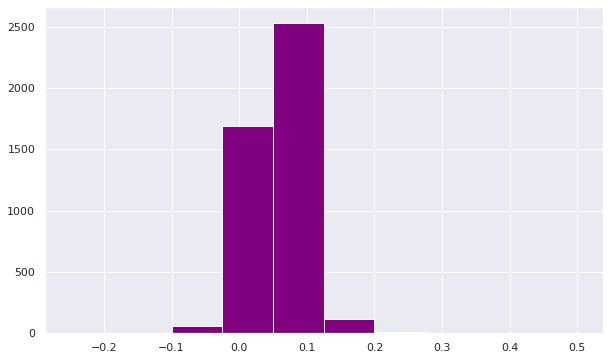

In [80]:
plt.figure(figsize = (10,6))
data['Polarity'].hist(color = 'purple')

We analyse sentiment using VADER sentiment analysis tool from Pythons NLTK library. Read about it here: https://pypi.org/project/vaderSentiment/

In [81]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

data['Compound'] = [sia.polarity_scores(v)['compound'] for v in data['HeadLine']]

data

,Date,Open,High,Low,Close,Adj Close,HeadLine,Polarity,Compound
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,status quo disturbed ayodhya says vajpayee fis...,0.113889,-0.9662
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,powerless north india gropes dark think laxman...,0.111538,-0.7184
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,string pulled stephen hawking india vajpayee g...,0.057956,0.4019
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,light combat craft takes india club class hawk...,0.268495,0.9726
6,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,light combat craft takes india club class hawk...,0.000362,-0.9974
...,...,...,...,...,...,...,...,...,...
6524,2018-12-24,35859.660156,35910.671875,35423.238281,35470.148438,35470.148438,xiaomi mi 5 redmi note 3 losing software suppo...,0.082810,-1.0000
6526,2018-12-26,35443.160156,35711.261719,35010.820313,35649.941406,35649.941406,gaja hit couple take poison man dies christmas...,0.044550,-1.0000
6527,2018-12-27,36002.109375,36041.238281,35781.949219,35807.281250,35807.281250,porn subscribers slam govt move ban 827 adult ...,0.010363,-0.9999
6528,2018-12-28,35911.988281,36194.781250,35911.988281,36076.718750,36076.718750,anticipatory bail murugadoss rrb je recruitmen...,0.017738,-0.9998


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4405 entries, 0 to 6531
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4405 non-null   datetime64[ns]
 1   Open       4405 non-null   float64       
 2   High       4405 non-null   float64       
 3   Low        4405 non-null   float64       
 4   Close      4405 non-null   float64       
 5   Adj Close  4405 non-null   float64       
 6   HeadLine   4405 non-null   object        
 7   Polarity   4405 non-null   float64       
 8   Compound   4405 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 344.1+ KB


Drop headline column since we have no use of it anymore

In [83]:

data.drop('HeadLine', axis = 1, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Polarity,Compound
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.113889,-0.9662
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.111538,-0.7184
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.057956,0.4019
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.268495,0.9726
6,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.000362,-0.9974


In [84]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Polarity,Compound
6524,2018-12-24,35859.660156,35910.671875,35423.238281,35470.148438,35470.148438,0.082810,-1.0000
6526,2018-12-26,35443.160156,35711.261719,35010.820313,35649.941406,35649.941406,0.044550,-1.0000
6527,2018-12-27,36002.109375,36041.238281,35781.949219,35807.281250,35807.281250,0.010363,-0.9999
6528,2018-12-28,35911.988281,36194.781250,35911.988281,36076.718750,36076.718750,0.017738,-0.9998
6531,2018-12-31,36239.191406,36285.460938,36033.949219,36068.328125,36068.328125,0.058279,-1.0000


Plotting the close price and a 28-day rolling mean of close price

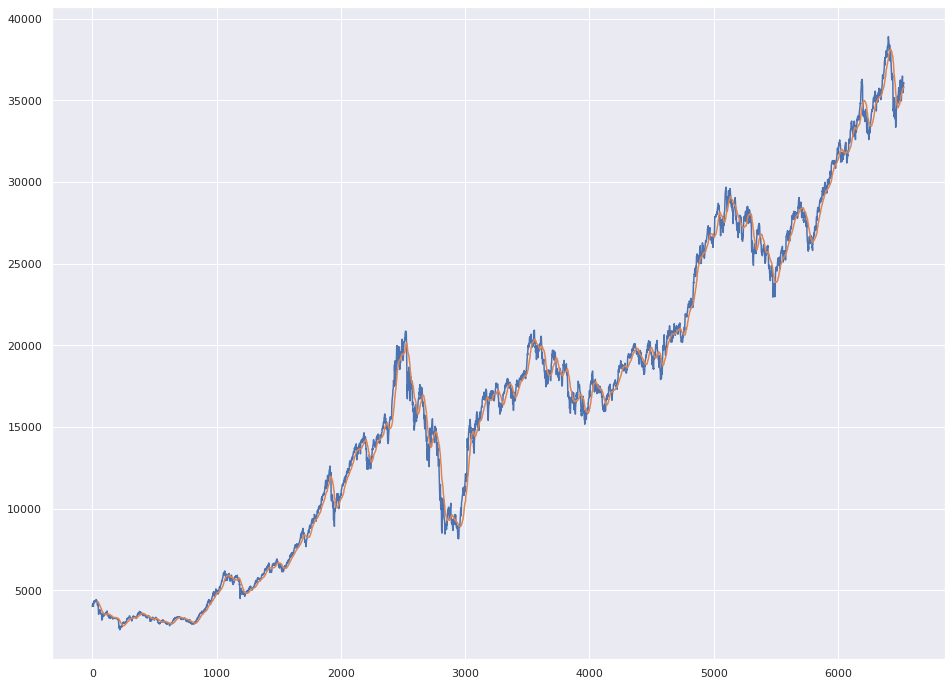

In [85]:
# setting figure size
plt.figure(figsize=(16,12))


data['Close'].plot()
data.rolling(window=28).mean()['Close'].plot()

**CONVERTING TIMESERIES TO SUPERVISED LEARNING PROBLEM BY PREDICTING ONE TIME STEP AHEAD**

In [86]:
# shifting next day 
data['close_price_shifted'] = data['Close'].shift(-1) #this will be out target variable
data['compound_price_shifted'] = data['Compound'].shift(-1)
data['polarity_price_shifted'] = data['Polarity'].shift(-1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Polarity,Compound,close_price_shifted,compound_price_shifted,polarity_price_shifted
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.113889,-0.9662,4060.020020,-0.7184,0.111538
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.111538,-0.7184,4115.370117,0.4019,0.057956
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.057956,0.4019,4183.729980,0.9726,0.268495
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.268495,0.9726,4120.430176,-0.9974,0.000362
6,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.000362,-0.9974,4125.310059,-0.9940,-0.052749


Creating features like moving average for 7,14,21 days and standard deviation for 7 days

In [87]:

ma_day = [7, 14, 21]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  data[column_name] = data['Adj Close'].rolling(ma).mean()

data["std_dev"]=data['Adj Close'].rolling(7).std()
data.head()

,Date,Open,High,Low,Close,Adj Close,Polarity,Compound,close_price_shifted,compound_price_shifted,polarity_price_shifted,MA for 7 days,MA for 14 days,MA for 21 days,std_dev
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.113889,-0.9662,4060.020020,-0.7184,0.111538,NaN,NaN,NaN,NaN
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.111538,-0.7184,4115.370117,0.4019,0.057956,NaN,NaN,NaN,NaN
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.057956,0.4019,4183.729980,0.9726,0.268495,NaN,NaN,NaN,NaN
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.268495,0.9726,4120.430176,-0.9974,0.000362,NaN,NaN,NaN,NaN
6,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.000362,-0.9974,4125.310059,-0.9940,-0.052749,NaN,NaN,NaN,NaN


In [88]:
#dropping rows with NaN values
data.dropna(axis=0, how='any', inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Polarity,Compound,close_price_shifted,compound_price_shifted,polarity_price_shifted,MA for 7 days,MA for 14 days,MA for 21 days,std_dev
27,2001-02-09,4395.439941,4436.479980,4387.990234,4397.330078,4397.330078,0.154630,0.9877,4406.299805,0.8749,0.058547,4353.654297,4313.526437,4240.988107,40.081823
30,2001-02-12,4429.910156,4446.080078,4389.020020,4406.299805,4406.299805,0.058547,0.8749,4363.049805,-0.8442,-0.087262,4370.824289,4340.610003,4259.436675,31.050910
31,2001-02-13,4437.319824,4440.759766,4354.100098,4363.049805,4363.049805,-0.087262,-0.8442,4363.109863,0.0516,-0.043802,4372.365723,4345.349993,4273.866664,30.232772
32,2001-02-14,4350.330078,4375.509766,4320.890137,4363.109863,4363.109863,-0.043802,0.0516,4437.990234,-0.9694,0.091958,4371.314244,4347.970703,4285.663795,30.436989
33,2001-02-15,4372.600098,4459.189941,4371.950195,4437.990234,4437.990234,0.091958,-0.9694,4330.319824,-0.9723,-0.011429,4380.271415,4355.668562,4297.771426,39.637369


Creating the target variable and having select columns in train data

In [89]:
y= data['close_price_shifted']
cols = ['Close', 'Compound', 'Polarity','Open', 'High', 'Low', 'MA for 7 days', 'MA for 14 days','MA for 21 days', 'std_dev', 'compound_price_shifted', 'polarity_price_shifted']
X= data[cols]

In [90]:
X.head()

,Close,Compound,Polarity,Open,High,Low,MA for 7 days,MA for 14 days,MA for 21 days,std_dev,compound_price_shifted,polarity_price_shifted
27,4397.330078,0.9877,0.154630,4395.439941,4436.479980,4387.990234,4353.654297,4313.526437,4240.988107,40.081823,0.8749,0.058547
30,4406.299805,0.8749,0.058547,4429.910156,4446.080078,4389.020020,4370.824289,4340.610003,4259.436675,31.050910,-0.8442,-0.087262
31,4363.049805,-0.8442,-0.087262,4437.319824,4440.759766,4354.100098,4372.365723,4345.349993,4273.866664,30.232772,0.0516,-0.043802
32,4363.109863,0.0516,-0.043802,4350.330078,4375.509766,4320.890137,4371.314244,4347.970703,4285.663795,30.436989,-0.9694,0.091958
33,4437.990234,-0.9694,0.091958,4372.600098,4459.189941,4371.950195,4380.271415,4355.668562,4297.771426,39.637369,-0.9723,-0.011429


**FEATURES SCALING AND RESHAPING NUMPY ARRAY**

In [91]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range = (-1, 1))
sc_Y = MinMaxScaler(feature_range = (-1, 1))
y = np.array(y).reshape((len(y) ,1))
train_data= sc_X.fit_transform(X)
target= sc_Y.fit_transform(y)

In [92]:
train_data=np.array(train_data)
print(train_data.shape)
print(target.shape)

(4384, 12)
(4384, 1)


X train has the (number of rows, number of features and timestep to predict) as dimensions TO feed into the LSTM layer

In [93]:
X_train = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))

**USING RECURRENT NEURAL NETWORK SPECIFICALLY LSTM AS PREDICTOR ALGORITHM BECAUSE OF ITS CAPABILITY OF LEARNING ORDER DEPENDENCY**

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 12, 200)           161600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 200)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 12, 200)           320800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 200)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 12, 200)           320800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 200)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)               

In [95]:
regressor.fit(X_train, target, epochs = 50, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/50
110/110 [==============================] - 18s 111ms/step - loss: 0.0569 - val_loss: 0.0013
Epoch 2/50
110/110 [==============================] - 11s 101ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 3/50
110/110 [==============================] - 11s 100ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 4/50
110/110 [==============================] - 11s 98ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 5/50
110/110 [==============================] - 11s 100ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 6/50
110/110 [==============================] - 11s 104ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 7/50
110/110 [==============================] - 11s 101ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 8/50
110/110 [==============================] - 11s 102ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 9/50
110/110 [==============================] - 11s 99ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 10/50
110/110 [==============================] - 11s 101ms/step - los

**TO AVOID TRAIN TEST DATA CONTAMINATION, WE TAKE TEST DATA SEPERATELY AND DO PREPROCCESSING ON IT**

Predict stock prices for the year 2019

In [96]:

test_news = news['2019-01-01':'2020-01-01']
test_news.index = np.arange(0, len(test_news))



test_stocks = histstocks['2019-01-01':'2020-01-01']
test_stocks.index = np.arange(0, len(test_stocks))
print(test_news.head())
print(test_stocks.head())

        Date                                           HeadLine
0 2019-01-01  guilty making fashion faux pas happy new year ...
1 2019-01-02  new animal birth centre sterilize 30 dogs day ...
2 2019-01-03  music director harris jayaraj scored highest m...
3 2019-01-04  gate 2019 admit card released gate iitm ac che...
4 2019-01-05  mysuru gets art space named artist baadal nanj...
        Date          Open  ...         Close     Adj Close
0 2019-01-02  36198.128906  ...  35891.519531  35891.519531
1 2019-01-03  35934.500000  ...  35513.710938  35513.710938
2 2019-01-04  35590.789063  ...  35695.101563  35695.101563
3 2019-01-07  35971.179688  ...  35850.160156  35850.160156
4 2019-01-08  35964.621094  ...  35980.929688  35980.929688

[5 rows x 6 columns]


Merging both news and stocks as done for training data

In [97]:
Merger=pd.merge(test_stocks, test_news, how='right', on='Date', indicator= True )
for i in range(len(Merger['HeadLine'])-1):
  if Merger['_merge'][i]=='right_only':
    Merger['HeadLine'][i+1]=(Merger['HeadLine'][i]) +" " + (Merger['HeadLine'][i+1])
Merger.dropna(how='any',inplace= True)
print(Merger.groupby('_merge').nunique())
Merger.drop('_merge', inplace=True, axis=1)
Merger.head(10)


            Date  Open  High  Low  Close  Adj Close  HeadLine
_merge                                                       
left_only      0     0     0    0      0          0         0
right_only     0     0     0    0      0          0         0
both         241   241   241  241    241        241       241


,Date,Open,High,Low,Close,Adj Close,HeadLine
1,2019-01-02,36198.128906,36236.699219,35734.011719,35891.519531,35891.519531,guilty making fashion faux pas happy new year ...
2,2019-01-03,35934.500000,35999.660156,35475.570313,35513.710938,35513.710938,music director harris jayaraj scored highest m...
3,2019-01-04,35590.789063,35744.199219,35382.078125,35695.101563,35695.101563,gate 2019 admit card released gate iitm ac che...
6,2019-01-07,35971.179688,36076.949219,35809.230469,35850.160156,35850.160156,mysuru gets art space named artist baadal nanj...
7,2019-01-08,35964.621094,36037.351563,35753.949219,35980.929688,35980.929688,youth aware politics politicians college clubs...
8,2019-01-09,36181.371094,36250.539063,35863.289063,36212.910156,36212.910156,flyer wheelchair held gold worth rs 36 lakh de...
9,2019-01-10,36258.000000,36269.308594,36070.761719,36106.500000,36106.500000,nilekani head rbi panel e payments dubbing boo...
10,2019-01-11,36191.871094,36214.261719,35840.601563,36009.839844,36009.839844,rs 10 lakh snatched gunpoint finance company e...
13,2019-01-14,36113.269531,36124.941406,35691.750000,35853.558594,35853.558594,railway regional website links check rrb group...
14,2019-01-15,35950.078125,36349.308594,35950.078125,36318.328125,36318.328125,happy pongal 2019 images cards greetings wishe...


Using a pandas pipeline for sentiment analysis for cleaner code and ease of deploying

In [98]:

!pip install pdpipe
import pdpipe as pdp

Bundling Pipeline for sentiment analysis

In [99]:
pipeline= pdp.ApplyByCols('HeadLine', getPolarity, result_columns= 'Polarity', drop=False)
pipeline+= pdp.ApplyByCols('HeadLine', lambda x: sia.polarity_scores(x)['compound'], result_columns='Compound', drop=False)

In [100]:
test_data= pipeline(Merger)
test_data.head()

,Date,Open,High,Low,Close,Adj Close,HeadLine,Compound,Polarity
1,2019-01-02,36198.128906,36236.699219,35734.011719,35891.519531,35891.519531,guilty making fashion faux pas happy new year ...,-0.9999,0.051726
2,2019-01-03,35934.500000,35999.660156,35475.570313,35513.710938,35513.710938,music director harris jayaraj scored highest m...,-0.9998,0.019917
3,2019-01-04,35590.789063,35744.199219,35382.078125,35695.101563,35695.101563,gate 2019 admit card released gate iitm ac che...,-0.9999,0.056757
6,2019-01-07,35971.179688,36076.949219,35809.230469,35850.160156,35850.160156,mysuru gets art space named artist baadal nanj...,-1.0000,0.026434
7,2019-01-08,35964.621094,36037.351563,35753.949219,35980.929688,35980.929688,youth aware politics politicians college clubs...,-0.9997,0.027124


Data Preprocessing including
1. Converting to supervised learning data
2. Create features like rolling average and standard devaition for 7 days 
3. Removing any missing data





In [101]:
test_data['close_price_shifted'] = test_data['Close'].shift(-1) #this will be out target variable
test_data['compound_price_shifted'] = test_data['Compound'].shift(-1)
test_data['polarity_price_shifted'] = test_data['Polarity'].shift(-1)
ma_day = [7, 14, 21]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  test_data[column_name] = test_data['Adj Close'].rolling(ma).mean()

test_data["std_dev"]=test_data['Adj Close'].rolling(7).std()
test_data.dropna(axis=0, how='any', inplace=True)
test_data.head()


,Date,Open,High,Low,Close,Adj Close,HeadLine,Compound,Polarity,close_price_shifted,compound_price_shifted,polarity_price_shifted,MA for 7 days,MA for 14 days,MA for 21 days,std_dev
29,2019-01-30,35819.671875,35850.410156,35490.968750,35591.250000,35591.250000,hc petrol pumps petition pil opening new petro...,-0.9998,0.004141,36256.691406,-0.9996,0.023964,35944.885603,36104.061663,36033.699777,336.133079
30,2019-01-31,35805.511719,36278.128906,35740.070313,36256.691406,36256.691406,navas moidhu performs arts medicine show navas...,-0.9996,0.023964,36469.429688,-0.9999,0.048991,35918.035714,36121.693918,36051.088914,294.486571
31,2019-02-01,36311.738281,36778.140625,36221.320313,36469.429688,36469.429688,800 primary middle schools closed 3rd day jact...,-0.9999,0.048991,36582.738281,-1.0000,0.029889,35969.601563,36165.684710,36096.599331,358.118080
34,2019-02-04,36456.218750,36622.769531,36225.480469,36582.738281,36582.738281,composer qaran mehta singer ash king create pe...,-1.0000,0.029889,36616.808594,-0.9999,0.042808,36024.978237,36184.571150,36138.867746,422.908917
35,2019-02-05,36573.039063,36727.828125,36495.828125,36616.808594,36616.808594,imc workers sari feb 3 civic body relaxes blue...,-0.9999,0.042808,36975.230469,-0.9998,0.034933,36109.445313,36205.679688,36175.374814,478.440480


Separating features and target variables to form a supervised learning problem

In [102]:
ytest= test_data['close_price_shifted']
cols = ['Close', 'Compound', 'Polarity','Open', 'High', 'Low', 'MA for 7 days', 'MA for 14 days','MA for 21 days', 'std_dev', 'compound_price_shifted', 'polarity_price_shifted']
Xtest= test_data[cols]



Feature Scaling and reshaping as per requirement of LSTM

In [103]:
from sklearn.preprocessing import MinMaxScaler
test_scX = MinMaxScaler(feature_range = (-1, 1))
test_scY = MinMaxScaler(feature_range = (-1, 1))
ytest = np.array(ytest).reshape((len(ytest) ,1))

Xtest= test_scX.fit_transform(Xtest)
y= test_scY.fit_transform(ytest)

In [104]:
X_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))
X_test.shape

(220, 12, 1)

**PREDICTING STOCK PRICE FOR 2019**

In [105]:
predictions = regressor.predict(X_test) 
predictions = test_scY.inverse_transform(predictions)

predictions[0:5]

array([[35630.824],
       [35773.797],
       [36048.336],
       [36054.445],
       [36176.77 ]], dtype=float32)

**PREDICTION ERROR METRICS**

In [106]:
regressor.evaluate(X_test, y, batch_size = 1)

220/220 [==============================] - 2s 5ms/step - loss: 0.0240


0.024022698402404785

Using mean squared error from sklearn.metrics

In [109]:
rmse = mean_squared_error(ytest, predictions)
print('Root Mean Square Error =', round(np.sqrt(rmse),4))

Root Mean Square Error = 490.4686


**VISUALISING THE RESULTS**

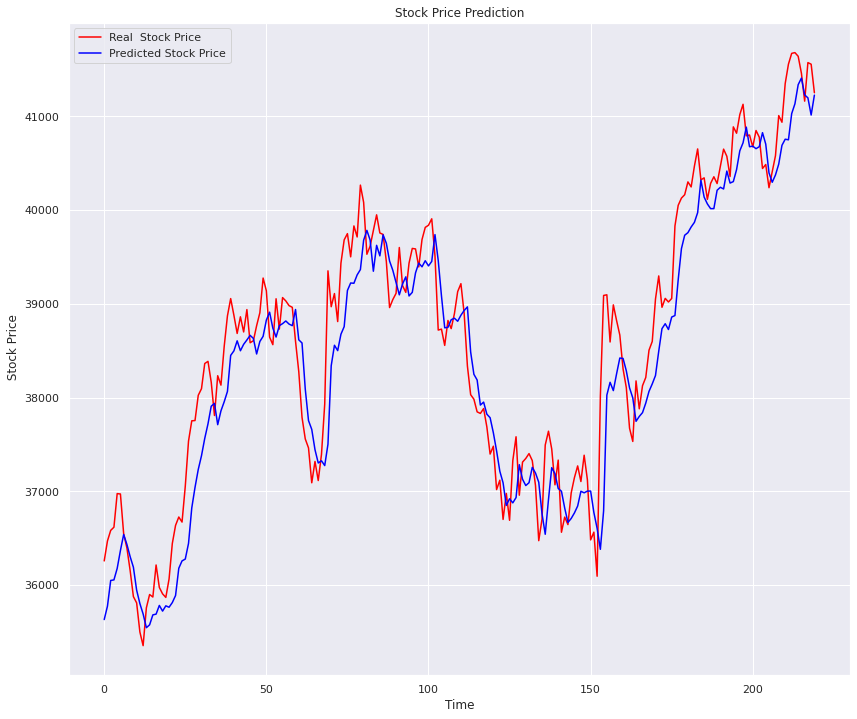

In [110]:
plt.figure(figsize=(14,12))
plt.plot(ytest, color = 'red', label = 'Real  Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

Thus a hybrid model of VADER sentiment analysis model and LSTM is used to predict stockprices of year 2019 one day at a time.